<a href="https://colab.research.google.com/github/PoojaPatel21/DataCamp-Projects/blob/master/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Description 
#Using RNN - LSTM long short term memory
#Predict stock market closing price using past 60 day stock closing price for a particular company
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
#Getting the stock quote 
df = web.DataReader('GOOGL',data_source='yahoo',start = '2010-01-01' , end = '2020-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310
...,...,...,...,...,...,...
2019-12-24,1352.010010,1344.170044,1350.209961,1344.430054,673400.0,1344.430054
2019-12-26,1363.199951,1345.510010,1346.550049,1362.469971,1183100.0,1362.469971
2019-12-27,1367.050049,1353.000000,1364.000000,1354.640015,1160600.0,1354.640015


In [3]:
#find the number of rows and columns in the dataset
df.shape

(2516, 6)

<function matplotlib.pyplot.show>

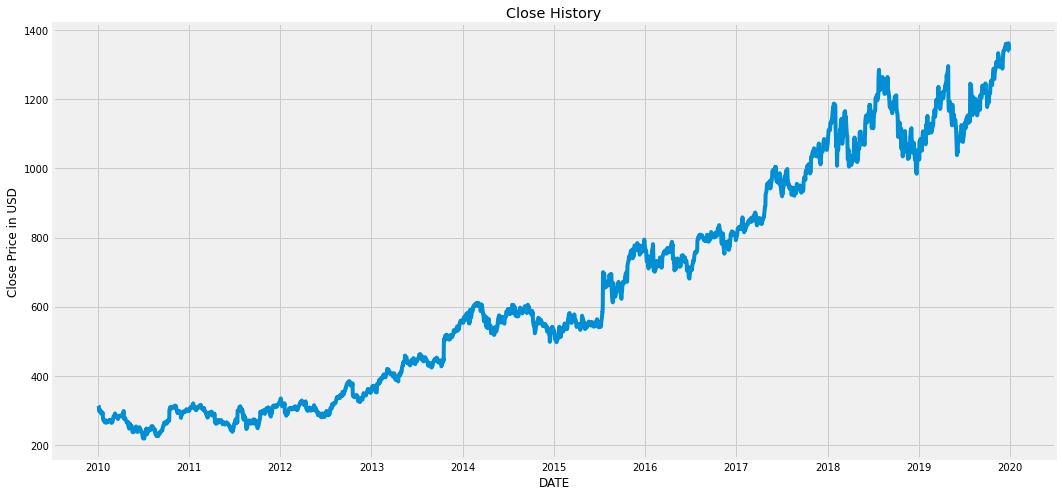

In [4]:
#visualize the closing price data 
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df['Close'])
plt.xlabel('DATE')
plt.ylabel('Close Price in USD')
plt.show

In [5]:
#create a new dataframe with only close column 
data = df.filter(['Close']) 

#convert dataframe to numpy array 

dataset = data.values
#get the number of rows to train the model on 

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

2013

In [6]:
#Scale the data to convert the values between 0 and 1 

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08340679],
       [0.08219952],
       [0.07531895],
       ...,
       [0.99315693],
       [0.98010865],
       [0.97982903]])

In [7]:
#create the training dataset

train_data = scaled_data[0:training_data_len , :]

#Split the data in X_train , y_train 

X_train = []
y_train = []

for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i , 0])
  y_train.append(train_data[i  , 0])
  if(i<=60):
    print(X_train)
    print(y_train)


[array([0.08340679, 0.08219952, 0.07531895, 0.0691251 , 0.07258945,
       0.07219141, 0.06754164, 0.0660588 , 0.06726607, 0.06295751,
       0.06629063, 0.06313684, 0.06426101, 0.04983935, 0.04546081,
       0.04651936, 0.04637939, 0.04296316, 0.04106039, 0.04240763,
       0.04157655, 0.04581951, 0.03967815, 0.04165091, 0.04260448,
       0.04390361, 0.04303314, 0.04388611, 0.04245137, 0.04602946,
       0.04467782, 0.04686931, 0.04579326, 0.04668557, 0.04330434,
       0.04172964, 0.03952506, 0.0396869 , 0.04226328, 0.04592448,
       0.04778786, 0.05184273, 0.05605069, 0.05529395, 0.05429226,
       0.06140469, 0.06345618, 0.0627563 , 0.05560014, 0.05648373,
       0.05664119, 0.05700864, 0.05420916, 0.05311561, 0.04939757,
       0.05304125, 0.05546892, 0.05538581, 0.05528083, 0.05714424])]
[0.05732357362978924]


In [0]:
#convert X_train and y_train to np.array

X_train, y_train = np.array(X_train),np.array(y_train)


In [9]:
#Reshape the data
#because lstm expects the data to be 3D
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1953, 60, 1)

In [0]:
#Building the model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Build the model

model.compile(optimizer = 'adam' ,loss ='mean_squared_error')


In [12]:
model.fit(X_train,y_train , batch_size=4,epochs=4)

Epoch 1/4
1953/1953 [==============================] - 27s 14ms/step - loss: 9.7568e-04
Epoch 2/4
1953/1953 [==============================] - 26s 13ms/step - loss: 3.8375e-04
Epoch 3/4
1953/1953 [==============================] - 26s 13ms/step - loss: 2.5354e-04
Epoch 4/4
1953/1953 [==============================] - 26s 13ms/step - loss: 2.0496e-04


In [0]:
#Create the testing dataset 

#a new array from 2013 to forward

test_data = scaled_data[training_data_len -60 : , :]
X_test =[]
y_test=dataset[training_data_len: , :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60 : i , 0])
  


In [0]:
#convert to numpy array
X_test = np.array(X_test)

#Reshape the data

X_test = np.reshape(X_test , (X_test.shape[0], X_test.shape[1],1))


In [0]:
#get the predicted price value
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


In [16]:
#Get the root mean square error 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


30.11435043449671

In [17]:
#Plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


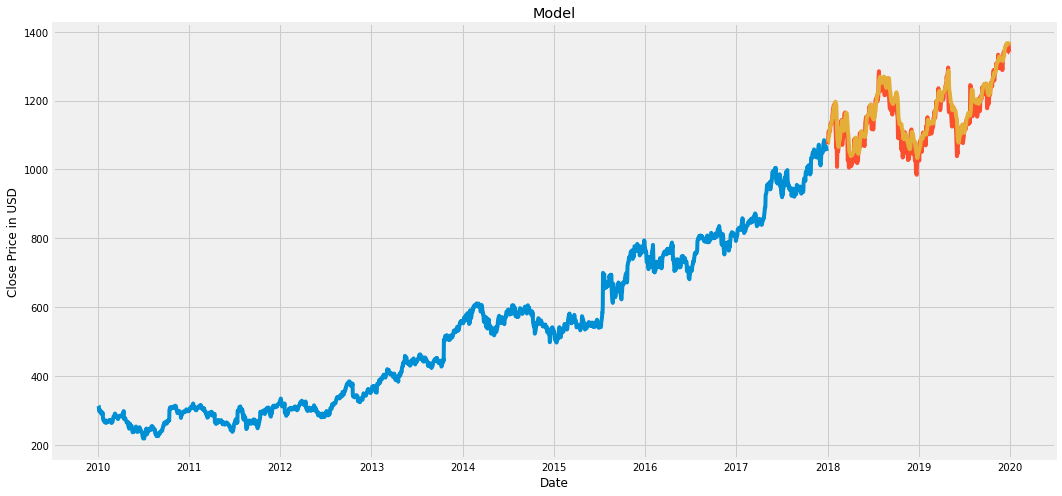

In [18]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price in USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.show()

In [19]:
#show the valid and predicted prices
valid


,Close,Predictions
Date,,
2018-01-02,1073.209961,1077.938354
2018-01-03,1091.520020,1078.242188
2018-01-04,1095.760010,1083.547729
2018-01-05,1110.290039,1090.929077
2018-01-08,1114.209961,1100.611694
...,...,...
2019-12-24,1344.430054,1365.979614
2019-12-26,1362.469971,1363.968140
2019-12-27,1354.640015,1365.268921


In [20]:
#Get the quote
google_quote = web.DataReader('GOOGL',data_source='yahoo',start='2010-01-01',end='2020-01-01')
google_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310
...,...,...,...,...,...,...
2019-12-24,1352.010010,1344.170044,1350.209961,1344.430054,673400.0,1344.430054
2019-12-26,1363.199951,1345.510010,1346.550049,1362.469971,1183100.0,1362.469971
2019-12-27,1367.050049,1353.000000,1364.000000,1354.640015,1160600.0,1354.640015


In [21]:
new_df = google_quote.filter(['Close'])

#get last 60 days value and convert the data frame to array

last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list

X_test = []
#Append past 60 days to X_test

X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[1361.1106]], dtype=float32)

In [23]:
google_quote = web.DataReader('GOOGL',data_source='yahoo',start='2020-01-01',end='2020-01-02')
google_quote

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.680054,1346.48999,1348.410034,1368.680054,1363900,1368.680054
